<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-и-предварительный-анализ" data-toc-modified-id="Импорт-и-предварительный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт и предварительный анализ</a></span></li><li><span><a href="#Замена-типов-и-приведение-к-единому-формату" data-toc-modified-id="Замена-типов-и-приведение-к-единому-формату-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Замена типов и приведение к единому формату</a></span></li></ul></li><li><span><a href="#Метрики" data-toc-modified-id="Метрики-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Метрики</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Описание проекта

Имея данные из Яндекс.Афиши за годовой период 2017-2018 гг. необходимо проанализировтаь источники трафика и выявить наименее выгодные источники привлечения. Это необходимо для отказа от невыгодных источников и перераспределения бюджета в дальнейшем.   

Также необходимо рассмотреть следующие моменты:

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

## Подготовка данных

### Импорт и предварительный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
print("visits дубликаты и пропущенные значения:", visits.duplicated().sum(), visits.isnull().sum().sum())
display(visits.head())
display(visits.info())
display(visits.describe())

visits дубликаты и пропущенные значения: 0 0


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [4]:
print("orders дубликаты и пропущенные значения:", orders.duplicated().sum(), orders.isnull().sum().sum())
display(orders.head())
display(orders.info())
display(orders.describe())

orders дубликаты и пропущенные значения: 0 0


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [5]:
print("costs дубликаты и пропущенные значения:", costs.duplicated().sum(), costs.isnull().sum().sum())
display(costs.head())
display(costs.info())
display(costs.describe())

costs дубликаты и пропущенные значения: 0 0


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


Каждая таблица состоит из 3-5 столбцов. У столбцов с датами типы данных object, которые необходимо поменять для рассчетов.
Пропусков и отрицательных значений в данных нет. Дубликаты отсутствуют. Название столбцов указаны с большой буквы и с пробелами, поэтому для удобства дальнейшей работы переведем их к нижнему регистру и заменим пробелы на нижнее подчеркивание. 

В таблице *orders* и *costs* есть единичные значения в столбцах *revenue* и *costs*, отличающиеся от среднего более чем в 13 раз для таблицы *costs* и 500 раз — для таблицы *orders*. Посмотрим на них далее при работе с данными.

### Замена типов и приведение к единому формату

In [6]:
# приводим все столбцы к нижнему регистру и заменяем пробелы на нижнее подчеркивание

visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

In [7]:
# меняем типы данных для столбцов с датами

visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

## Метрики

### Продуктовые метрики

**2.1.1. DAU, WAU и MAU**

In [8]:
# я нашел в интернете более лаконичный вариант рассчета MAU/WAU/DAU, использую его вместо стандартного метода из уроков
# создаем новую таблицу, чтобы не менять основную, в которой индексом будет время старта сессии

visit_metrics = visits.set_index(['start_ts'])

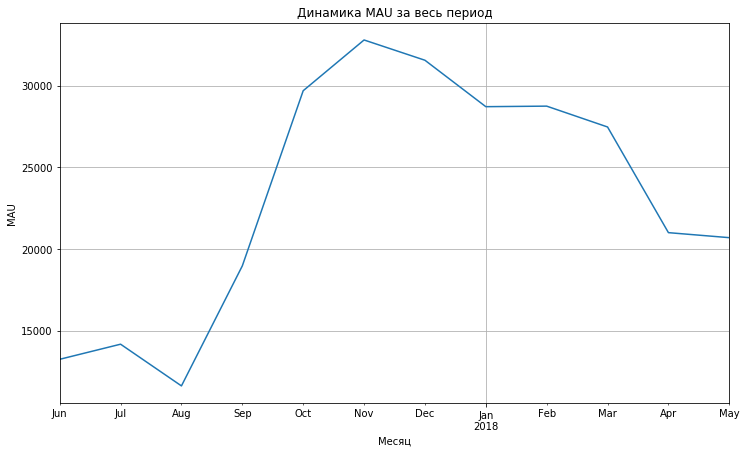

In [9]:
# рассчитаем метрики методом resample и отдельно сохраняем среднее

mau = visit_metrics.resample('M').uid.nunique()
mau_total = visit_metrics.resample('M').uid.nunique().mean().round(2)

# строим график для оценки изменения метрик во времени

mau.plot(figsize=(12,7), legend=False, grid=True, title='Динамика MAU за весь период');
plt.xlabel('Месяц')
plt.ylabel('MAU');

На графике МАU видно, что количество активных пользователей в месяц очень резко выросло c начала осени и росло очень высокими темпами вплоть до ноября — свыше 30 тысяч уникальных пользователей. При этом перед этим скачком, в августе, зафиксированы самые низкие результаты МАU — . Это может быть связано с особенностями сезона, лето традиционно является наименее популярным временем для посещения театров и других мероприятий в закрытых помещениях. Более того, летом многие театры находятся на каникулах, а традиционный театральный сезон начинается осенью. 

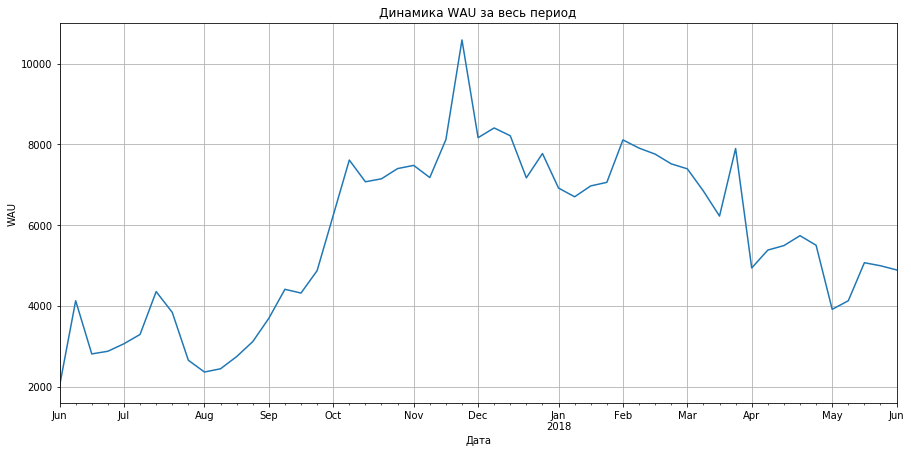

In [10]:
wau = visit_metrics.resample('W').uid.nunique()
wau_total = visit_metrics.resample('W').uid.nunique().mean()

wau.plot(figsize=(15,7), legend=False, grid=True, title='Динамика WAU за весь период');
plt.xlabel('Дата')
plt.ylabel('WAU');

График еженедельной аудитории чуть более детально демонстрирует те же особенности, что и график активных пользователей за месяц, однако в случае с WAU мы видим больше пиков и падений. Помимо максимального показателя в последнюю неделю ноября, мы можем разглядеть маленькие пики в начале июня и середине июля, а также в начале февраля и конце марта. Также гораздо отчетлвиее чем на графике MAU видно, что рост количества уникальных пользователей в период начался не с осени, а плавно набирал обороты с начала августа.

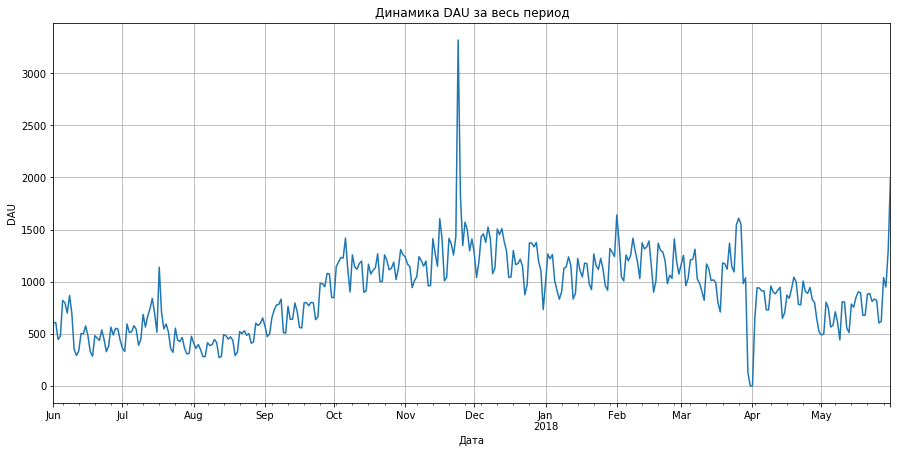

In [11]:
dau = visit_metrics.resample('D').uid.nunique()
dau_total = visit_metrics.resample('D').uid.nunique().mean()

dau.plot(figsize=(15,7), legend=False, grid=True, title='Динамика DAU за весь период');
plt.xlabel('Дата')
plt.ylabel('DAU');

Показатели ежедневных активный пользователей показывают глубину, которая недоступна на уровне месяца и недели. Так, мы видим отчетливые "горки" резких взлетов и падений практически каждый месяц, причем причем в среднем по раза, что похоже на влияние традиционной рабочей недели на активность пользователей. Это может быть связано с большей популярностью сайта в пятницу и выходные и меньше популярностью в начале недели. 

Кроме того на графике видно резкий рост числа активных пользователей в конце мая, вышедший на уровень второго места среди дневных наблюдений за весь период. 

При этом худший показателей DAU не в августе, как в предыдущих метриках, а в конце марта и начале апреля, когда количество активных пользователей упало до 0. Возможно это связано с техническими проблемами на сайте или другими неполадками, так как в этот период в других метриках пусть и наблюдалось падение показателей, но не в таких масштабах, а логическое объяснение падения спроса на сайт в конце марта-начале апреля с точки зрения сезонности, в целом, сложно найти.

In [12]:
print(int(mau_total), 'уникальных пользователей в среднем в месяц за весь период')
print(int(wau_total), 'уникальных пользователей в среднем в неделю за весь период')
print(int(dau_total), 'уникальных пользователей в среднем в день за весь период')

23228 уникальных пользователей в среднем в месяц за весь период
5716 уникальных пользователей в среднем в неделю за весь период
905 уникальных пользователей в среднем в день за весь период


In [13]:
sticky_mau = (dau_total/mau_total) * 100
sticky_wau = (dau_total/wau_total) * 100
print('Соотношение ежедневных пользователей к пользователям за неделю — {0:.2f}'.format(float(sticky_wau)))
print('Соотношение ежедневных пользователей к пользователям за месяц — {0:.2f}'.format(float(sticky_mau)))

Соотношение ежедневных пользователей к пользователям за неделю — 15.84
Соотношение ежедневных пользователей к пользователям за месяц — 3.90


Можно сказать, что данные подвержены сезонности. Количество уникальных пользователей в день за весь период 907, в неделю — 5716, в месяц — 23228. Как по графикам, больше всего клиентов в ноябре, а меньше всего в летние месяцы. Низкие показатели могут быть связаны с отпусками и каникулами для театров, а высокие с крупным мероприятием в ноябре или какой-то рекламной кампанией с акциями или скидками.

Мы видим, что показатели часто меняются в рамках одной недели. 

**2.1.2 Сколько раз за день пользователи в среднем заходят на сайт**

In [14]:
visits['session_date'] = visits['start_ts'].dt.date

visits_new = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
visits_new.columns = ['n_sessions', 'n_users']
visits_new['sess_per_user'] = (visits_new['n_sessions'] / visits_new['n_users']).round(2)

In [15]:
print(round(visits_new['sess_per_user'].mean(), 2), '— среднее количество сессий день на одного пользователя за весь период')

1.08 — среднее количество сессий день на одного пользователя за весь период


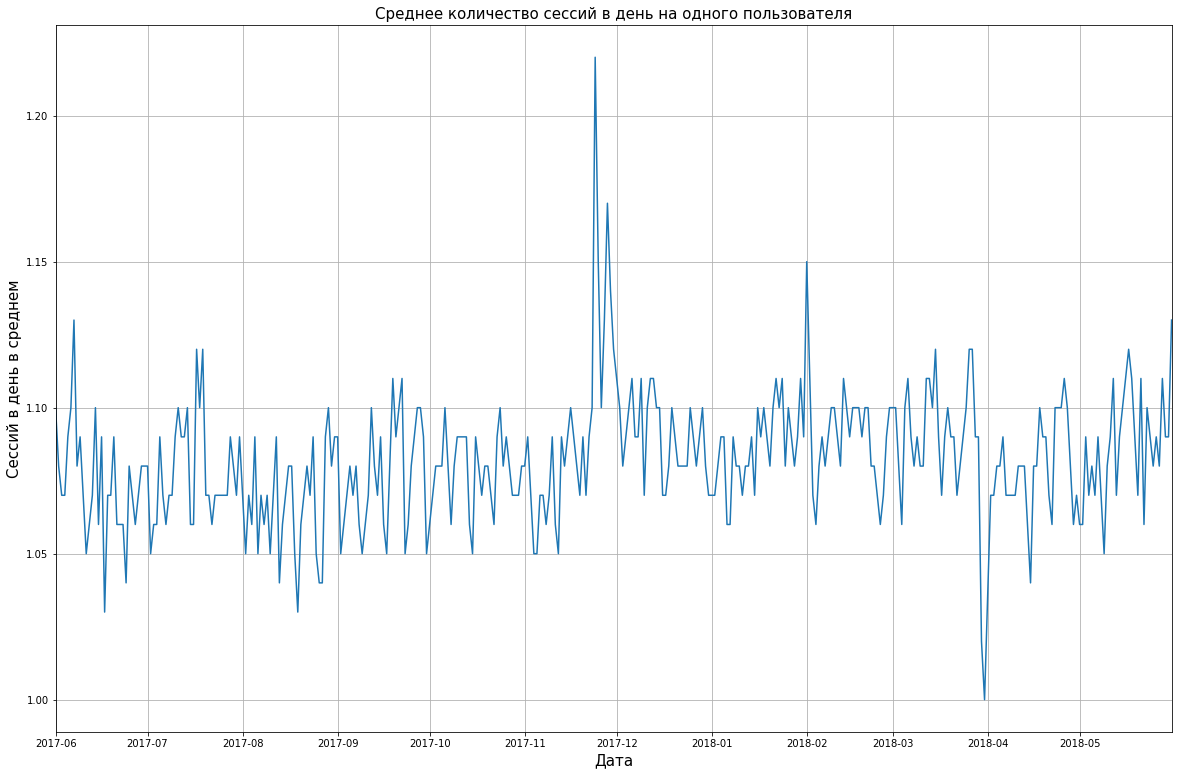

In [16]:
visits_new['sess_per_user'].plot(figsize=(20,13), grid=True);
plt.title('Среднее количество сессий в день на одного пользователя', fontsize=15)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Сессий в день в среднем', fontsize=15);

In [17]:
visits_new.reset_index(inplace=True)
visits_new['session_date'] = pd.to_datetime(visits_new['session_date'])

visits_new[visits_new['sess_per_user'] > 1.15]

,session_date,n_sessions,n_users,sess_per_user
176,2017-11-24,4042,3319,1.22
180,2017-11-28,1746,1493,1.17


По графику выше можно заметить, что среднее значение за весь период с июня 2017 по май 2018 редко выпадает из промежутка 1.05-1.10 сессий в день. Однако в конце ноября наблюдается значительный всплеск, где показатели превышают 1.20 сессий в день, а в в конце марта самые низкие показатели около 1 сессий в день ровно. С чем это связано сложно сказать: каких-то праздников и крупных событий в эти даты на национальном уровне нет, однако возможно в конце ноября состоялось какое-то событие, которое привело к всплеску посещаемости, а в конце марта была какая-то проблема с сайтом, однако достоверно сказать об этом нельзя. 

Более того, разница в среднем количестве сессий также не очень велика, а большая часть данных в целом равномерно распределена около показателя 1.10 сессий в день, поэтому говорить о каких-то значительных аномалиях также сложно.

**2.1.3. Сколько времени пользователи проводят на сайте. Продолжительность типичной пользовательской сессии за весь период**

In [18]:
# посчитаем продолжительность сессий и среднюю продолжительность 

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Средняя продолжительность сессии в минутах: ', (visits['session_duration'].mean() / 60).round(2))
print('Медианная продолжительность сессии в минутах: ', (visits['session_duration'].median() / 60).round(2))

Средняя продолжительность сессии в минутах:  10.73
Медианная продолжительность сессии в минутах:  5.0


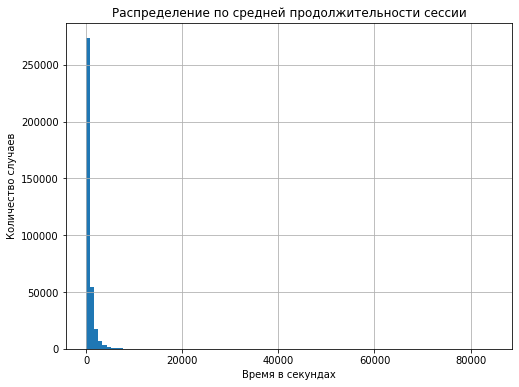

In [19]:
# строим гистограмму и видим, что распределение не похоже на нормальное

visits['session_duration'].hist(bins=100, figsize=(8,6));
plt.title('Распределение по средней продолжительности сессии')
plt.xlabel('Время в секундах')
plt.ylabel('Количество случаев');

In [20]:
# проверяем количество нулевых сессий, судя по графику они есть 
visits[visits['session_duration'] == 0]

,device,end_ts,source_id,start_ts,uid,session_date,session_duration
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,0
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957,2017-11-09,0
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510,2017-11-30,0
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332,2018-02-23,0
...,...,...,...,...,...,...,...
358511,desktop,2017-09-15 11:31:00,4,2017-09-15 11:31:00,6406595666419694649,2017-09-15,0
358514,desktop,2018-01-16 23:57:00,5,2018-01-16 23:57:00,6457848932283204350,2018-01-16,0
358522,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,0
358524,touch,2018-01-18 13:38:00,4,2018-01-18 13:38:00,4558073034499185861,2018-01-18,0


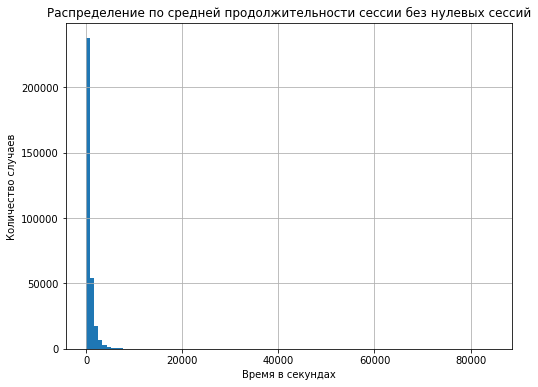

In [21]:
# исключим сессии с 0 секунд, чтобы получить более корректные данные и построим новый график
visits_without_null = visits.query('session_duration > 0')

visits_without_null['session_duration'].hist(bins=100, figsize=(8,6));
plt.title('Распределение по средней продолжительности сессии без нулевых сессий')
plt.xlabel('Время в секундах')
plt.ylabel('Количество случаев');

In [22]:
# считаем моду для средней продолжительности
asl = visits_without_null['session_duration'].mode()[0]
asl

60

In [23]:
print('Средняя продолжительность сессии в минутах без 0 значений:', 
      (visits_without_null['session_duration'].mean() / 60).round(2))
print('Медианная продолжительность сессии в минутах  без 0 значений:', 
      (visits_without_null['session_duration'].median() / 60).round(2))

Средняя продолжительность сессии в минутах без 0 значений: 11.91
Медианная продолжительность сессии в минутах  без 0 значений: 6.0


In [24]:
print('Максимальная продолжительность сессии в секундах:', (visits['session_duration'].max()))
print('Минимальная продолжительность сессии в секундах (кроме 0 сессий):', (visits_without_null['session_duration'].min())) 

Максимальная продолжительность сессии в секундах: 84480
Минимальная продолжительность сессии в секундах (кроме 0 сессий): 19


При грубом подсчете cредняя продолжительность сессии составляет 10.7 минут, однако данные распределены крайне неравномерно. Так, максимальная продолжительность сессии почти сутки (около 23,5 часов), а минимальная сессия 0 секунд. Всего в данных около 35 тысяч сессий с 0 секунд. Это может быть связано с ошибкой в данных или особенностями округления (например, если округление поминутное, то 1 и 59 секунда могут отметиться как одна и та же минута)

Таким образом, наиболее подходящей мерой для рассчета ASL (средней продолжительности сессии) является мода, которая в данном случае равна 60 секундам. В целом за это время можно определиться с выбором или посмотреть интересующуюся дату/событие, но все равно этот показатель выглядит заниженным.

**2.1.4. Retention Rate**

In [25]:
# нашел более лаконичный способ выделения когорт и рассчета retention, использую его

def get_month(x): 
    return dt.datetime(x.year, x.month,1)
visits['session_month'] = visits['start_ts'].apply(get_month)
grouping = visits.groupby('uid')['session_month']
visits['cohort_month'] = grouping.transform('min')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_duration,session_month,cohort_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,1440,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,0,2017-12-01,2017-12-01


In [26]:
def get_date (df, column):
    '''
    Получаем нужный тип дат для рассчета lifetime для когорт
    
    Функция получает нужный тип дат для дальнейшего рассчета время пользования
    lifetime для когортного анализа
    '''
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day 

session_year, session_month, session_day  = get_date(visits,'session_month')
cohort_year, cohort_month, cohort_day = get_date(visits,'cohort_month')

year_diff = session_year - cohort_year 
month_diff = session_month - cohort_month
day_diff = session_day - cohort_day

visits['cohort_lifetime'] = year_diff * 12 + month_diff + 1 # прибавим 1 месяц, чтобы когорты считались не с 0, а с 1

In [27]:
# считаем активных уникальных пользователей за месяц по когортам

grouping = visits.groupby(['cohort_month', 'cohort_lifetime'])
cohort_data = grouping['uid'].apply(pd.Series.nunique).reset_index()
cohort_data['cohort_month'] = cohort_data['cohort_month'].dt.date # чтобы даты были аккуратными

cohort_counts = cohort_data.pivot_table(
    index='cohort_month',
    columns='cohort_lifetime',
    values='uid')

cohort_counts 

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# считаем retention
cohort_size = cohort_counts.iloc[:, 0] # сохраняем в переменной число пользователей на первый месяц
retention = cohort_counts.divide(cohort_size, axis=0) # делим активных юзеров в каждый месяц на число юзеров на первый месяц
retention.fillna('').round(3) # округляем до 3 знаков, чтобы лучше видеть разницу, т.к. показатели слишком маленькие

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


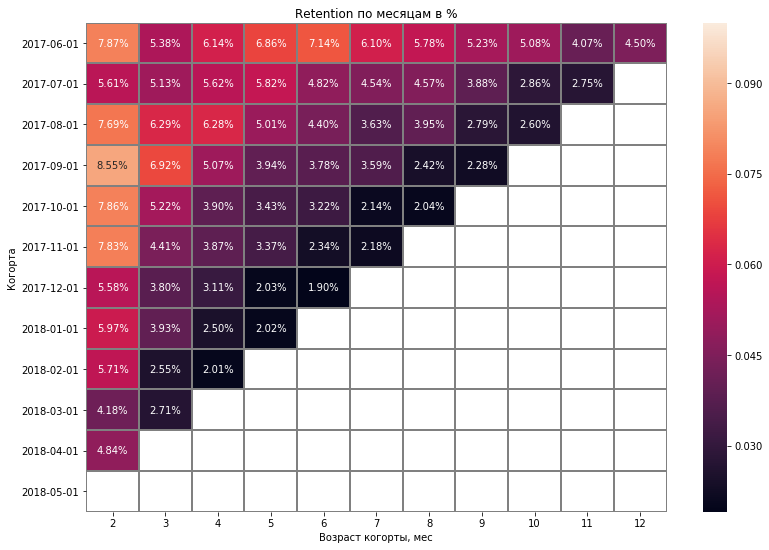

In [29]:
plt.figure(figsize=(13, 9))
sns.heatmap(retention.iloc[:12, 1:12], annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmax=0.1);
plt.title('Retention по месяцам в %')
plt.ylabel('Когорта')
plt.xlabel('Возраст когорты, мес');

In [30]:
print('Retention на второй месяц — {:.1%}'.format(retention.mean(axis=0)[2]))

Retention на второй месяц — 6.5%


Судя по тепловой карте выше, можно видеть, что Retention на второй месяц по всем когортам очень сильно (практически полностью) падает. Лучшим показателем на второй месяц является Retention когорты сентября 2017 года, с 8.55%, то есть почти 92% падением за месяц. В других когортах ситуациях примерно аналогичная, но показатель retention еще ниже. Со временем retention также снижается, retention на второй месяц для когорт в 2018 году уже около 5%, тогда как у первых когорь около 7,5%.

Однако стоит отметить, что дальнейшее снижение retention rate в рамках когорты гораздо слабее и в ряде случаев даже растет со временем (как у июньской когорты, например). 

Средний Retention на 2 месяц равен 6,5%, что в целом, как уже было сказано выше, крайне низкий показатель.

### Метрики электронной коммерции

**2.2.1. Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки**

In [31]:
# сохраняем в отдельные df сгрупированные по юзерам и датам первого посещения/покупки данные
first_order_time = orders.groupby(['uid'])['buy_ts'].min().reset_index().rename({'buy_ts': 'first_order_time'}, axis=1)
first_session_time = visits.groupby(['uid'])['start_ts'].min().reset_index().rename({'start_ts': 'first_session_time'}, axis=1)

In [32]:
# объединяем таблицы
visit_order = first_order_time.merge(first_session_time)
visit_order

,uid,first_order_time,first_session_time
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


In [33]:
visit_order['time_to_first_order'] =  (visit_order['first_order_time'] - visit_order['first_session_time']).dt.seconds
print(int((visit_order['time_to_first_order'].mean() / 60)), 'минут — cреднее время между первым посещением и покупкой')

249 минут — cреднее время между первым посещением и покупкой


<a id='cell221' ><a/>

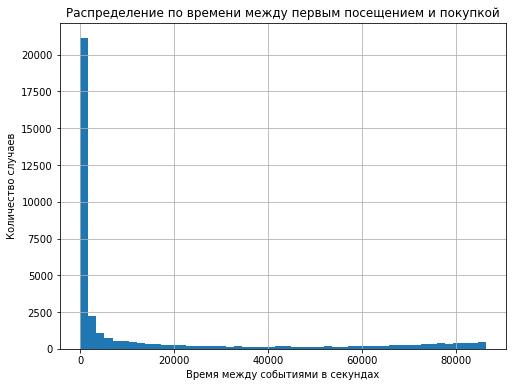

In [34]:
visit_order['time_to_first_order'].hist(bins=50, figsize=(8,6));
plt.title('Распределение по времени между первым посещением и покупкой')
plt.xlabel('Время между событиями в секундах')
plt.ylabel('Количество случаев');

In [35]:
print(len(visit_order.query('time_to_first_order == 0')), '— число участников с совпадающим временем заказа и первого посещения')

2467 — число участников с совпадающим временем заказа и первого посещения


In [36]:
# исключим данные с 0 секунд на заказ
visit_order_without_null = visit_order.query('time_to_first_order != 0') 

In [37]:
visit_order_without_null['time_to_first_order'].mode()[0]

60

Среднее время между покупкой и первым посещением составляет 249 минут или чуть больше 4 часов. Однако на [графике](#cell221) выше видно, что распределение ненормальное, поэтому проверив моду мы видим, что мода равняется 60 секундам. Также в базе имеется около 2.5 тысяч юзеров (6.5% от общего числа юзеров, совершивших покупку), у которых дата покупки совпадает с датой первого посещения, что маловероятно с точки зрения пользовательского опыта. Для того, чтобы оба события совпали поминутно необходимо успеть попасть на сайт и оформить заказ. Это, в целом, не выглядит невозможным, но кажется не очень популярным вариантом для пользователей: чтобы все успеть за минуту необходимо заранее заполнить все данные и выбрать необходимые пункты (события, места, билеты и т.д).

С технической точки зрения это может быть связано с ошибкой в базе, где время округлилось с какой-то ошибкой (не поминутно, например) или в таблицу orders вместо времени покупки попали данные времени посещений по ошибке.

**2.2.2. Среднее количество покупок на одного покупателя за 6 месяцев**

In [38]:
# используем функцию get_month из пункта по расчету retention

orders['order_month'] = orders['buy_ts'].apply(get_month)

In [39]:
# сгруппируем данные по кол-ву покупок и кол-ву уникальных юзеров, совершивших покупки 
avg_purchases = orders.groupby('order_month')['uid'].agg(['count', 'nunique'])
avg_purchases.columns = ['n_purchases', 'n_buyers']
avg_purchases.head()

,n_purchases,n_buyers
order_month,,
2017-06-01,2354,2023
2017-07-01,2363,1984
2017-08-01,1807,1472
2017-09-01,3387,2750
2017-10-01,5679,4675


In [40]:
avg_purchases['purchases_per_user'] = avg_purchases['n_purchases'] / avg_purchases['n_buyers']

In [41]:
avg_purchases_pivot = avg_purchases.pivot_table(
    index='order_month',
    values='purchases_per_user'
).round(2)
avg_purchases_pivot

,purchases_per_user
order_month,
2017-06-01,1.16
2017-07-01,1.19
2017-08-01,1.23
2017-09-01,1.23
2017-10-01,1.21
2017-11-01,1.24
2017-12-01,1.26
2018-01-01,1.21
2018-02-01,1.24


In [42]:
print(avg_purchases['purchases_per_user'][:6].mean().round(2), '— среднее количество покупок на юзера за 6 месяцев')

1.21 — среднее количество покупок на юзера за 6 месяцев


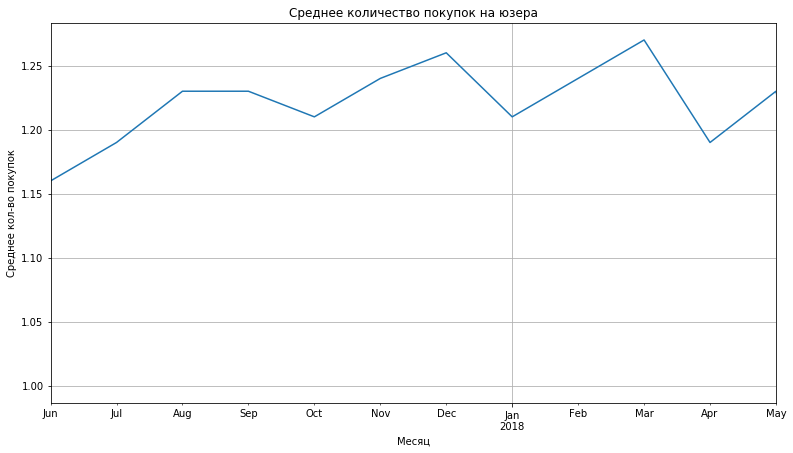

In [43]:
avg_purchases_pivot.plot(figsize=(13,7), title='Среднее количество покупок на юзера', legend=False, grid=True);
plt.xlabel('Месяц')
plt.ylabel('Среднее кол-во покупок')
plt.xlim(plt.xlim()[0], plt.xlim()[1]-1);

Как видно по графику выше, в каждый месяц количество покупок больше чем покупателей, то есть один покупатель в среднем делает чуть больше 1 одного заказа в месяц. Динамика изменений присутствует, однако она крайне незначительна, показатели редко выходят за пределы 1.20-1.25 заказов в месяц. Самые высокие показатели относительно других месяцев наблюдались в декабре, и в марте: 1.27 и 1.26 покупок на одного пользователя. Среднее количество покупок на юзера за 6 месяцев также не сильно отличается — 1.21 покупка.

Июнь 2018 года в данном случае мной не учитывался, так как в этот месяц была всего одна покупка. Это связано с тем, что в июне 2018 только один день в таблице (1 июня в 00:02), поэтому учитывать эти данные за месяц некорректно и я исключил их из графика. 

**2.2.3. Средний чек с группировкой по времени совершения покупки**

In [44]:
print('Cредний чек — {:.1f} у.е'.format(orders['revenue'].mean().round(2))) 

Cредний чек — 5.0 у.е


In [45]:
# посчитаем количество покупок и общую сумму покупок по месяцам

avg_spend = orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'count'}).rename({'uid':'n_orders'}, axis=1)
avg_spend['avg_spend'] = (avg_spend['revenue'] / avg_spend['n_orders']).round(2)
avg_spend

,revenue,n_orders,avg_spend
order_month,,,
2017-06-01,9557.49,2354,4.06
2017-07-01,12539.47,2363,5.31
2017-08-01,8758.78,1807,4.85
2017-09-01,18345.51,3387,5.42
2017-10-01,27987.70,5679,4.93
2017-11-01,27069.93,5659,4.78
2017-12-01,36388.60,6218,5.85
2018-01-01,19417.13,4721,4.11
2018-02-01,25560.54,5281,4.84


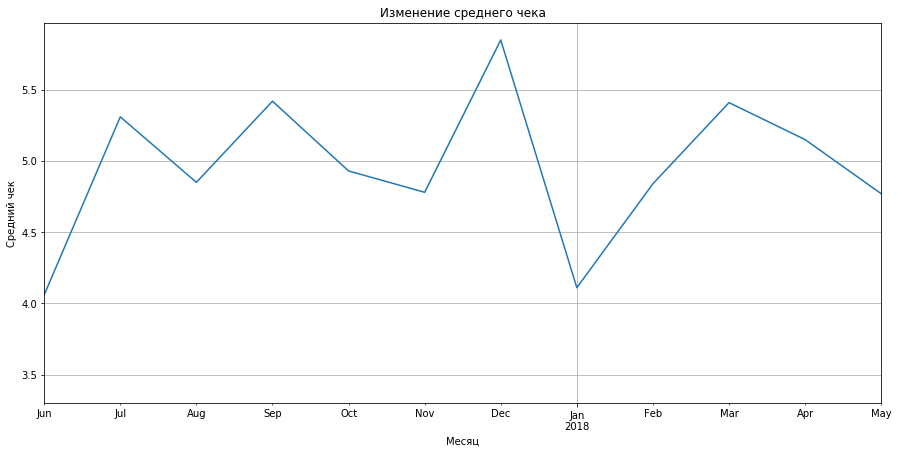

In [46]:
avg_spend.plot(figsize=(15,7), y='avg_spend', grid=True, legend=False);
plt.title('Изменение среднего чека')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.xlim(plt.xlim()[0], plt.xlim()[1]-1);

In [47]:
print('Cредний чек за весь период (без июня 2018) — {:.2f} у.е'.format(avg_spend['avg_spend'][:-1].mean()))

Cредний чек за весь период (без июня 2018) — 4.96 у.е


На графике выше можно заметить, что средний чек в целом не выпадал из промежутка от 4 до 5.5 у.е. 

В июне 2017 и январе 2018 года зафиксированы самые низкие показатели среднего чека, однако это связано не только в абсолютных цифрах по выручке и количеству покупателей это не самые худшие месяцы, все дело именно в соотношении выручки и пользователей. В июне 17 года показатель выручки действительно низкий для 2.3 тысяч покупателей, а в январе сумма выручки в целом нормальная, но количество покупателей сильно больше.

При этом лучшим месяцем является декабрь: это видно и по пику среднего чека и по абсолютным цифрам выручки и количества покупателей. Логичным объяснением этого является Новый год и традиция дарить подарки, а также большое количество детских событий: новогодних елок и представлений.

Как и в пункте 2.2.2, данные по июню исключены из графика и рассчета среднего, так как в июне всего одна покупка.

**2.2.4. Изменение LTV на покупателя по когортам при 100% маржинальности**

In [48]:
# сгруппируем данные по юзерам и дате первой покупки

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [49]:
# посчитаем число новых покупателей за каждый месяц 

orders_cohort_sizes = (first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'}).reset_index())

orders_cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [50]:
# объединим таблицы для построения когорт
orders_new = pd.merge(orders, first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [51]:
# посчитаем суммарную выручку для каждой когорты в каждый месяц

cohorts_orders = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
cohorts_orders.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [52]:
# объединим таблицы с данными по количеству новых покупателей за каждый месяц

report = orders_cohort_sizes.merge(cohorts_orders, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [53]:
# так как маржинальность 100%, то валовая прибыль будет равна выручке, но для корректности я записал полную формулу

margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M') + 1 # чтобы не было 0 мес
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,1
1,2017-06-01,2023,2017-07-01,981.82,981.82,2
2,2017-06-01,2023,2017-08-01,885.34,885.34,3
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,4
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,5


In [54]:
# посчитаем LTV и для визуальной чистоты заполним NaN пустыми значениями
report['ltv'] = report['gp'] / report['n_buyers']
report['first_order_only_month'] = report['first_order_month'].dt.date 
output = report.pivot_table(index='first_order_only_month', columns='age', values='ltv', aggfunc='mean').round(2)
output.fillna('')

age,1,2,3,4,5,6,7,8,9,10,11,12
first_order_only_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


In [55]:
# посчитаем накопительный LTV 
ltv_output = output.cumsum(axis=1).round(2)
# рассчитаем средний LTV по всем когортам по сроку жизни, добавим отдельной строкой
ltv_output.loc['avg_cohort'] = ltv_output.mean(axis=0).round(2)
ltv_output.fillna('')

age,1,2,3,4,5,6,7,8,9,10,11,12
first_order_only_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


In [56]:
print('Средний LTV на 6 месяц в у.е.:', ltv_output.mean(axis=0)[6])

Средний LTV на 6 месяц в у.е.: 7.97


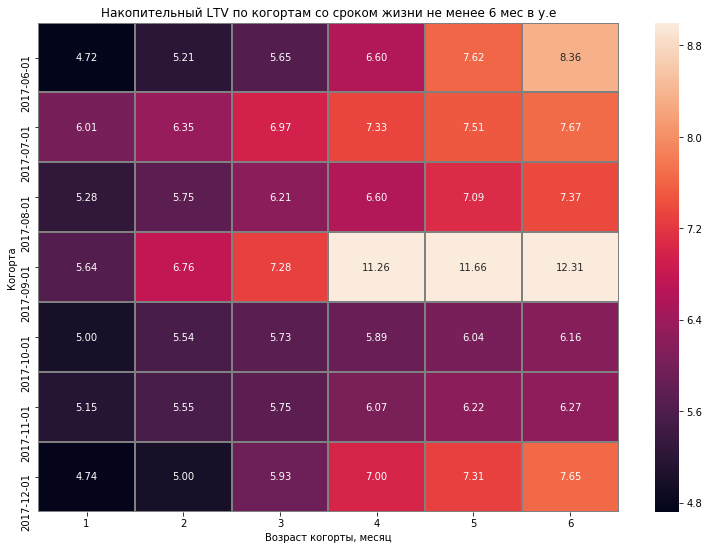

In [57]:
plt.figure(figsize=(13, 9))
sns.heatmap(ltv_output.iloc[0:7, 0:6], annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=9);
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта')
plt.title('Накопительный LTV по когортам со сроком жизни не менее 6 мес в у.е');

Как заметно по тепловой карте в среднем LTV по всем когортам рос одинаково (ежемесячный рост около 10%), однако в сентябрьской когорте на 4 месяц произошел резкий скачок на 55%. Ни у одной когорты аналогичного роста больше не наблюдалось. Более того, на этот же 4 месяц никакая другая когорта не получила такой же резкий рост. 

Средний LTV для когорт за 6 месяцев составил 7.97 у.е, при этой самый высокий LTV у сентябрьской когорты — 12.31, в 1.5 раза больше среднего значения по всем когортам.  

### Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.
Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

In [58]:
# чтобы получить главный источник по каждому юзеру объединим ранее созданную таблицу first_session_time с visits
visits_sources = visits.merge(first_session_time, left_on=['uid','start_ts'], right_on=['uid','first_session_time'])
visits_sources.head()

,device,end_ts,source_id,start_ts,uid,session_date,session_duration,session_month,cohort_month,cohort_lifetime,first_session_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12-01,2017-12-01,1,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02-01,2018-02-01,1,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07-01,2017-07-01,1,2017-07-01 01:54:00
3,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,0,2017-12-01,2017-12-01,1,2017-12-27 14:06:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,60,2017-09-01,2017-09-01,1,2017-09-03 21:35:00


In [59]:
print(visits_sources['uid'].count(), 'строк в таблице')
print(visits_sources['uid'].nunique(), 'уникальных юзеров')
display(visits_sources['uid'].value_counts().head(2))

# почему-то одна строка c юзером 1981020429381477763 скопировалась дважды, проверим ее
visits_sources.query('uid == "1981020429381477763"')

228170 строк в таблице
228169 уникальных юзеров


1981020429381477763     2
15524371937328942332    1
Name: uid, dtype: int64

,device,end_ts,source_id,start_ts,uid,session_date,session_duration,session_month,cohort_month,cohort_lifetime,first_session_time
28517,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763,2018-03-16,120,2018-03-01,2018-03-01,1,2018-03-16 08:55:00
28518,touch,2018-03-16 08:55:00,1,2018-03-16 08:55:00,1981020429381477763,2018-03-16,0,2018-03-01,2018-03-01,1,2018-03-16 08:55:00


In [60]:
# удалим дубликат и проверим снова
visits_sources.drop_duplicates(subset=['uid'], inplace=True)
print(visits_sources['uid'].count(), 'строк в таблице')
visits_sources.query('uid == "1981020429381477763"')

228169 строк в таблице


,device,end_ts,source_id,start_ts,uid,session_date,session_duration,session_month,cohort_month,cohort_lifetime,first_session_time
28517,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763,2018-03-16,120,2018-03-01,2018-03-01,1,2018-03-16 08:55:00


In [61]:
# удалим лишние столбцы, чтобы они не мешали
visits_sources = visits_sources[['source_id', 'start_ts', 'uid', 'first_session_time', 'cohort_month']].copy()

In [62]:
visits_sources.head()

,source_id,start_ts,uid,first_session_time,cohort_month
0,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01
1,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01
2,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01
3,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01
4,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-01


**2.3.1. Общая сумма расходов на маркетинг по источникам за весь период**

In [63]:
# получим месяц из полной даты для дальнейшей работы с данными
costs['month'] = costs['dt'].apply(get_month)

In [64]:
# видим, что кампании были каждый день с 1 июня 2017 года по 31 мая 2018 
costs.groupby('dt').agg({'costs':'sum'})

,costs
dt,
2017-06-01,735.26
2017-06-02,721.19
2017-06-03,450.85
2017-06-04,761.16
2017-06-05,821.44
...,...
2018-05-27,532.87
2018-05-28,619.44
2018-05-29,784.79


In [65]:
# при этом источников всего 7 
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


<a id='cell231' ><a/>

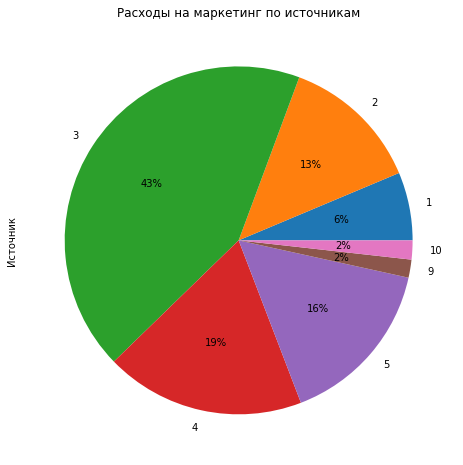

In [66]:
costs_by_source.plot(kind='pie', y='costs', figsize=(8,8), legend=False, autopct='%.f%%');
plt.title('Расходы на маркетинг по источникам')
plt.ylabel('Источник');

На графике "Расходы на маркетинг по источникам" очень четко наблюдается масштаб превосходства трат на источник 3 в сравнении с другими источниками. В абсолютных цифрах расходы на маркетинг на третий источник составляют 141 тысячу у.е., тогда как общие расходы на маркетинг 329 тысяч. Идущий на втором месте по расходами источник 4 "отстает" от третьего источника более чем в 2 раза. 
В процентном соотношении разница еще более очевидна: 43% всех расходов пришлись на источник 3, далее идет источник 4 с 19%, источник 5 с 16%, а также источник 2 с 13% расходов на маркетинг от общей суммы. Оставшиеся три источники 1,9 и 10 даже суммарно не превышают 10%.

In [67]:
print(int(costs['costs'].sum()), 'у.е. — общие расходы на маркетинг за весь период')

329131 у.е. — общие расходы на маркетинг за весь период


In [68]:
# для рассмотрения изменений по каждому источнику по времени сделаем группировку по месяцу и источнику по расходам на маркетинг

monthly_costs_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}
        ).rename({'costs':'source_costs'}, axis=1).reset_index()

# чтобы даты были красивыми (без 00:00:00) приведем данные к формату date

monthly_costs_source['date_only'] = monthly_costs_source['month'].dt.date
monthly_costs_source

,month,source_id,source_costs,date_only
0,2017-06-01,1,1125.61,2017-06-01
1,2017-06-01,2,2427.38,2017-06-01
2,2017-06-01,3,7731.65,2017-06-01
3,2017-06-01,4,3514.80,2017-06-01
4,2017-06-01,5,2616.12,2017-06-01
...,...,...,...,...
79,2018-05-01,3,9411.42,2018-05-01
80,2018-05-01,4,4214.21,2018-05-01
81,2018-05-01,5,3669.56,2018-05-01
82,2018-05-01,9,362.17,2018-05-01


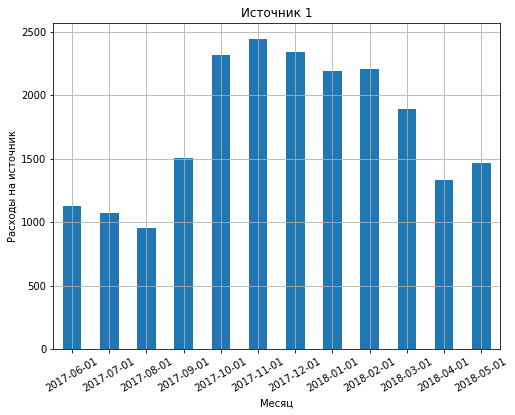

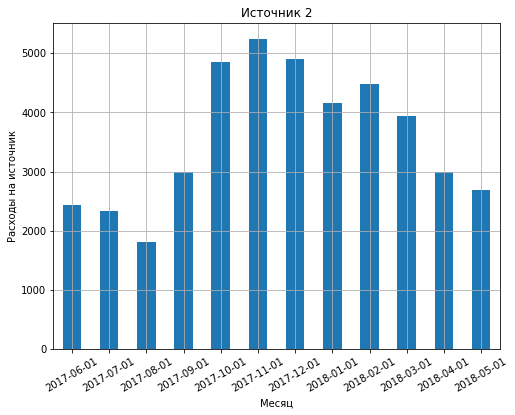

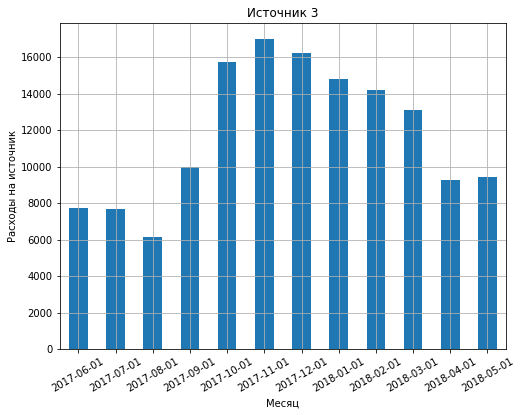

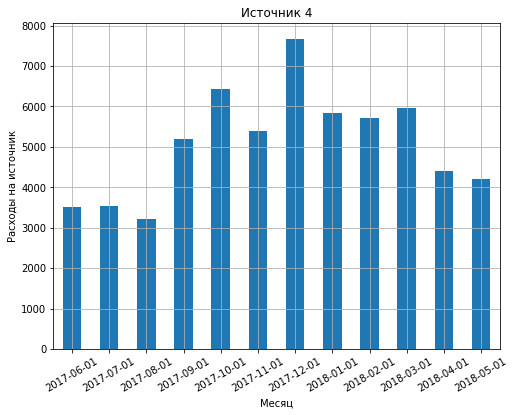

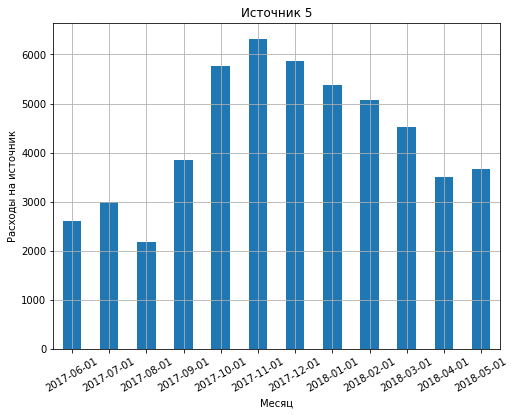

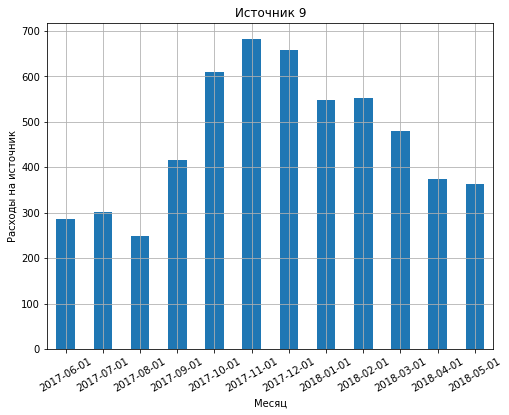

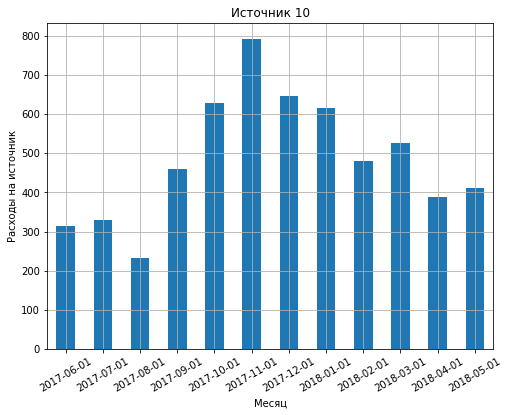

In [69]:
# автоматизируем построение графиков 

for source_id, sources in monthly_costs_source.groupby('source_id'):
    sources.plot(
        kind='bar', x='date_only', y='source_costs',
        title="Источник "+ str(source_id), figsize=(8, 6), rot=30,
        grid=True, legend=False
    )
    plt.xlabel('Месяц')
    plt.ylabel('Расходы на источник')

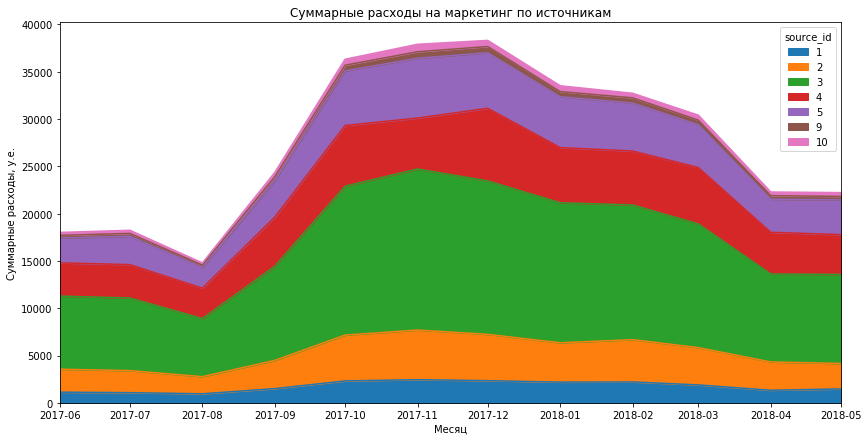

In [70]:
monthly_costs_source.pivot_table(
    index='date_only',
    columns='source_id',
    values='source_costs',
    aggfunc='sum'   
).plot.area(figsize=(14,7), title='Суммарные расходы на маркетинг по источникам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные расходы, у.е.');

График суммарных расходов по всем источникам повторяет тенденции расходов по отдельным источникам: пик расходов приходится на период с октября до конца ноября, а затем плавно идет вниз, как и у большинства источников. 

Источник 1 и 2 визуально несколько выбиваются из тренда, однако и у них самые высокие расходы пришлись на октябрь-ноябрь, просто разница со следующими месяцами менее ощутима из-за дальнейшего поддержания высоких расходов и в зимний период.

Всего в таблице **costs** 2542 строки, при этом кампании запускались ежедневно на протяжении почти года (364 дня) по каждому источнику (кроме нескольких дней). Как видно на графике ["Расходы на маркетинг по источникам"](#cell231) наибольшие расходы у источника 3 — почти половина от общих расходов (141 322 у.е из 329 тысяч). На источники 1,9 и 10 имеют было потрачено меньше всего денег. 

В разрезе источников, практически по всем источникам больше всего относительно других месяцев в рамках источника трат было в период с октября по ноябрь 2017 года. Рекламные кампании проводились каждый день, но расходы эти в месяцы были особенно велики. При этом в абсолютных цифрах наибольшие расходы у источника 3: только в ноябре 2017 года расходы на него около 16 тысяч у.е, даже больше, чем суммарно на источники 9 и 10.

**2.3.2. Средний CAC на одного покупателя для всего проекта и для каждого источника трафика**

In [71]:
# посмотрим на распределение в таблицах orders и costs по датам
print(orders['buy_ts'].describe())
costs['dt'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object


count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [72]:
# посчитаем расходы за месяц
monthly_costs = costs.groupby('month').agg({'costs':'sum'})
monthly_costs.head()

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [73]:
# объединим таблицы с расходами на маркетинг и с данными по когортам
report_new = report.merge(monthly_costs, left_on='first_order_month', right_on='month')

# посчитаем САС
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,first_order_only_month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,1,4.724414,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,2,0.485329,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,3,0.437637,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,4,0.954671,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,5,1.022531,2017-06-01,18015.0,8.905091


In [74]:
# сгруппируем когорты по САС
cac_mean = report_new.groupby('first_order_month').agg({'cac':'mean'}).reset_index()
cac_mean

,first_order_month,cac
0,2017-06-01,8.905091
1,2017-07-01,9.485486
2,2017-08-01,10.796015
3,2017-09-01,9.441654
4,2017-10-01,8.369327
5,2017-11-01,9.288870
6,2017-12-01,8.741809
7,2018-01-01,9.937302
8,2018-02-01,8.962758
9,2018-03-01,8.608907


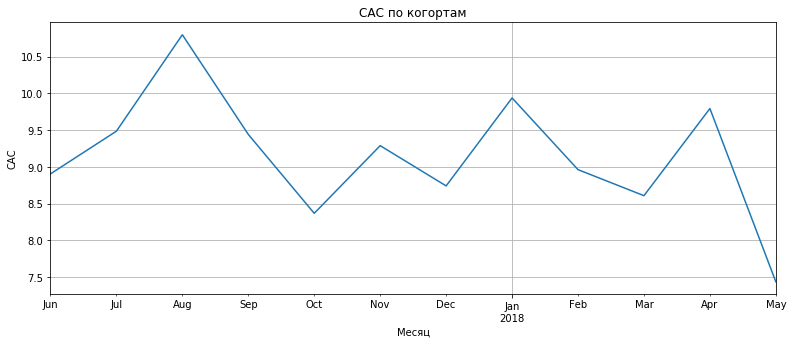

In [75]:
cac_mean.plot(x='first_order_month', figsize=(13,5), grid=True, title='САС по когортам', legend=False);
plt.xlabel('Месяц')
plt.ylabel('CAC');

Пиковые значения среднего САС пришлись на несколько месяцев, равномерно распределенных по всему году: на август — 10.8, на январь — 9.9, и апрель — 9,8 у.е за привлечение одного клиента. 
Вместе с этим самым лучшим месяцем по стоимости привлечения клиентов стал май, когда САС составил 7.44 у.е, что приблизительно на 20% ниже среднего значения.

In [76]:
print(cac_mean['cac'].mean().round(2), '— средний CAC по всем когортам')

9.15 — средний CAC по всем когортам


In [77]:
# видим, что в таблице visits встречаются источники, которых нет в costs

print(costs['source_id'].unique())
print(visits['source_id'].unique())

[ 1  2  3  4  5  9 10]
[ 4  2  5  9  3  1 10  7  6]


In [78]:
# в таблице visits_sources 
visits_sources.head() 

,source_id,start_ts,uid,first_session_time,cohort_month
0,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01
1,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01
2,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01
3,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01
4,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-01


In [79]:
# группируем покупателей по источникам

full_visits_sources = orders.merge(visits_sources, on='uid', how='inner')

buyers_by_source = full_visits_sources.groupby('source_id').agg({'uid':'nunique'}
        ).rename(columns={'uid':'buyers'})
buyers_by_source

,buyers
source_id,
1,2899
2,3506
3,10473
4,10296
5,6931
7,1
9,1088
10,1329


In [80]:
# объединяем две таблицы с кол-вом покупателей и расходами по источникам 
cac_sources = buyers_by_source.join(costs_by_source)
# заполним 0 одного юзера из источника 7, который пришел бесплатно (на этот источник не тратились деньги)
cac_sources.fillna(0, inplace=True)
cac_sources

,buyers,costs
source_id,,
1,2899,20833.27
2,3506,42806.04
3,10473,141321.63
4,10296,61073.60
5,6931,51757.10
7,1,0.00
9,1088,5517.49
10,1329,5822.49


In [81]:
# посчитаем САС по источникам и отсортируем вывод по наибольшему САС
cac_sources['cac'] = cac_sources['costs'] / cac_sources['buyers']
cac_sources.sort_values('cac', ascending=False)

,buyers,costs,cac
source_id,,,
3,10473,141321.63,13.493901
2,3506,42806.04,12.209367
5,6931,51757.10,7.467479
1,2899,20833.27,7.186364
4,10296,61073.60,5.931779
9,1088,5517.49,5.071222
10,1329,5822.49,4.381106
7,1,0.00,0.000000


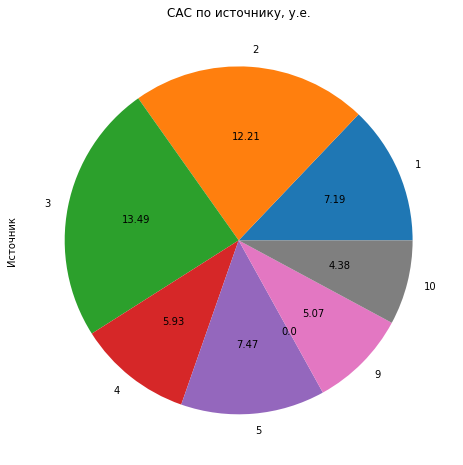

In [82]:
# функция для отображения абсолютных величин на пайчарте

def absolute_value(val):
    a  = np.round(val/100 * cac_sources['cac'].sum(), 2)
    return a

cac_sources.plot(kind='pie', y='cac', figsize=(8, 8), legend=False, autopct=absolute_value);
plt.title('САС по источнику, у.е.')
plt.ylabel('Источник');

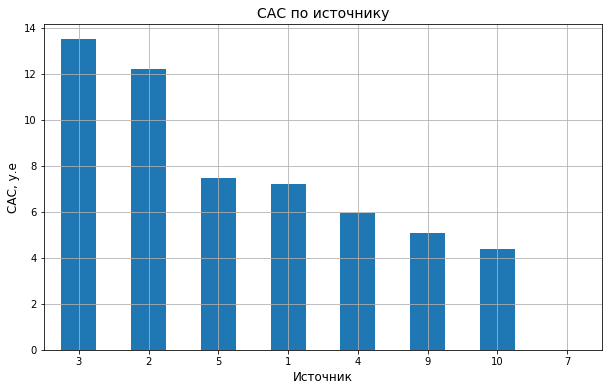

In [83]:
cac_sources['cac'].sort_values(ascending=False).plot(kind='bar', rot=0, figsize=(10,6), grid=True, legend=False)
plt.title('САС по источнику', fontsize=14)
plt.xlabel('Источник', fontsize=12)
plt.ylabel('САС, у.е', fontsize=12);

Средний САС для всего проекта составляет 9.15 у.е. График изменения САС по когортам за весь период похож на линию гор: есть несколько пиков — в августе, январе и апреле, когда САС немного повышался. При этом самая низкая стоимость привлечения в мае 2018 года, когда стоимость привлечения одного юзера составляла 7.44 у.е.

По источникам же САС как видно на обоих графиках в среднем на уровне 7 у.е., однако в источниках номер 2 и 3 цифры значительно выше — 12 и 13.5 у.е. Привлечение одного пользователя по всем остальным источникам суммарно дешевле чем по источникам 2 и 3 вместе взятым. 

Всерьез учитывать источник 7 нельзя: он состоит из одного юзера, поэтому для общей картины и полноты данных его можно оставить на графиках, но учитывать в данных не очень уместно.

**2.3.3. ROMI по когортам в разрезе источников**

In [84]:
# в таблице report_new уже есть все данные, чтобы посчитать для начала общий ROMI 

report_new['romi'] = report_new['ltv'] / report_new['cac']
romi_output = report_new.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')

# посчитаем накопительный ROMI

romi_output.cumsum(axis=1).round(2).fillna('')

age,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [85]:
romi_output.cumsum(axis=1).mean(axis=0)

age
1     0.540816
2     0.581985
3     0.631069
4     0.719740
5     0.782946
6     0.859876
7     0.896819
8     0.969951
9     1.053871
10    0.964488
11    1.094658
12    1.333982
dtype: float64

Обычно когорты окупаются ближе к году жизни. В среднем это время составляет 9 месяцев. На 10 месяц средний ROMI опускается чуть ниже единицы: это связано с тем, что когорт, "живущих" 10 месяцев всего три и их накопительный ROMI в целом недостаточно высок, чтобы в среднем цифра была больше единицы. В следующие месяцы ROMI вновь растет. Далее посчитаем ROMI по источникам.

In [86]:
full_visits_sources

,buy_ts,revenue,uid,order_month,source_id,start_ts,first_session_time,cohort_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01 00:09:00,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01 00:25:00,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01 07:31:00,2017-06-01 07:31:00,2017-06-01
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,2018-05-31 09:11:00,2018-05-31 09:11:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,2018-05-31 23:05:00,2018-05-31 23:05:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,2018-05-31 23:52:00,2018-05-31 23:52:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,3,2017-10-23 12:32:00,2017-10-23 12:32:00,2017-10-01


In [87]:
# сгруппируем данные по выручке с источника
revenue_by_source = full_visits_sources.groupby(['source_id', 'cohort_month', 'order_month']).agg({'revenue':'sum'})
revenue_by_source

revenue
source_id cohort_month order_month         
1         2017-06-01   2017-06-01   1378.70
                       2017-07-01    662.73
                       2017-08-01    683.12
                       2017-09-01   1613.45
                       2017-10-01   1055.58
...                                     ...
10        2018-03-01   2018-04-01     22.42
                       2018-05-01      7.62
          2018-04-01   2018-04-01    237.44
                       2018-05-01     21.26
          2018-05-01   2018-05-01    364.34

[540 rows x 1 columns]

In [88]:
# объединим данные таблицы с кол-во покупателей и САС по источникам с новой таблицей с выручкой по источникам
full_sources = cac_sources.join(revenue_by_source).reset_index()

In [89]:
# посмотрим на выручку в абсолютных цифрах
full_sources.groupby(['source_id']).agg({'revenue':'sum', 'buyers':'max'}).round(2)

,revenue,buyers
source_id,,
1,31090.55,2899
2,46923.61,3506
3,54511.24,10473
4,56696.83,10296
5,52624.02,6931
7,1.22,1
9,5759.40,1088
10,4450.33,1329


In [90]:
# так как маржинальность 100%, то валовая прибыль будет равна выручке, но для корректности использую полную формулу
margin_rate = 1

full_sources['gp'] = full_sources['revenue'] * margin_rate
full_sources['age'] = (full_sources['order_month'] - full_sources['cohort_month']) / np.timedelta64(1, 'M') + 1
full_sources['age'] = full_sources['age'].round().astype('int')

full_sources.head() 

,source_id,cohort_month,order_month,buyers,costs,cac,revenue,gp,age
0,1,2017-06-01,2017-06-01,2899,20833.27,7.186364,1378.70,1378.70,1
1,1,2017-06-01,2017-07-01,2899,20833.27,7.186364,662.73,662.73,2
2,1,2017-06-01,2017-08-01,2899,20833.27,7.186364,683.12,683.12,3
3,1,2017-06-01,2017-09-01,2899,20833.27,7.186364,1613.45,1613.45,4
4,1,2017-06-01,2017-10-01,2899,20833.27,7.186364,1055.58,1055.58,5


In [91]:
# посчитаем LTV и посмотрим на накопительный LTV
full_sources['ltv'] = full_sources['gp'] / full_sources['buyers']
final_ltv_output = full_sources.pivot_table(index='source_id', columns='age', values='ltv', aggfunc='sum').round(2)

final_ltv_output = final_ltv_output.cumsum(axis=1).round(2)
final_ltv_output.fillna('')

age,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,5.01,5.91,6.53,7.47,8.05,8.43,8.75,9.51,9.94,10.24,10.52,10.7
2,5.11,6.84,8.56,10.41,11.32,12.03,12.38,12.6,12.81,13.08,13.27,13.38
3,3.60,4.16,4.4,4.61,4.8,4.93,5.03,5.09,5.14,5.17,5.19,5.2
4,3.64,4.07,4.28,4.48,4.65,4.86,5.06,5.13,5.22,5.35,5.43,5.5
5,4.15,4.64,4.93,6.5,6.75,7.06,7.23,7.36,7.44,7.55,7.57,7.58
7,1.22,,,,,,,,,,,
9,2.18,2.76,3.29,3.76,4.18,4.39,4.64,4.82,5.07,5.22,5.27,5.28
10,2.67,2.9,3,3.06,3.19,3.25,3.3,3.32,3.32,3.33,3.34,3.35


In [92]:
# сопоставляем LTV и САС по источникам
full_sources.groupby('source_id').agg({'ltv':'sum', 'cac':'mean'}).round(2)

,ltv,cac
source_id,,
1,10.72,7.19
2,13.38,12.21
3,5.20,13.49
4,5.51,5.93
5,7.59,7.47
7,1.22,0.00
9,5.29,5.07
10,3.35,4.38


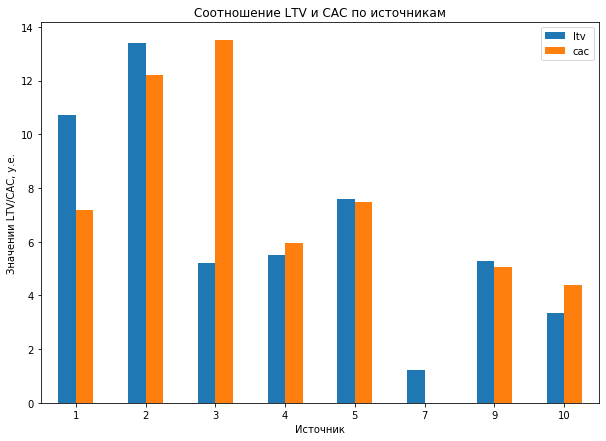

In [93]:
full_sources.groupby('source_id').agg({'ltv':'sum', 'cac':'mean'}).plot(kind='bar', figsize=(10,7), rot=0)
plt.xlabel('Источник')
plt.ylabel('Значения LTV/CAC, у.е.')
plt.title('Соотношение LTV и САС по источникам');

На графике выше отчетливо видна разница в расходах и LTV в источнике 3, даже визуально заметна разница более чем в 2 раза.
У других источников в целом нет подобного рода сильных расхождений: в большинстве случаев LTV и САС не сильно отличаются. При этом источников, вышедших в плюс все-таки больше: 5 окупившихся и 3 с расходами, превышающими доходы. 

In [94]:
# посчитаем ROMI по источникам 
full_sources['romi'] = full_sources['ltv'] / full_sources['cac']
final_romi_output = full_sources.pivot_table(index='source_id', columns='age', values='romi', aggfunc='sum')
final_romi_output = final_romi_output.cumsum(axis=1).round(2).dropna() # dropna для удаления пустого источника 7
final_romi_output.fillna('')

age,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,0.70,0.82,0.91,1.04,1.12,1.17,1.22,1.33,1.39,1.43,1.47,1.49
2,0.42,0.56,0.70,0.85,0.93,0.99,1.01,1.03,1.05,1.07,1.09,1.10
3,0.27,0.31,0.33,0.34,0.36,0.37,0.37,0.38,0.38,0.38,0.38,0.39
4,0.61,0.69,0.72,0.76,0.78,0.82,0.85,0.86,0.88,0.90,0.92,0.93
5,0.56,0.62,0.66,0.87,0.91,0.95,0.97,0.99,1.00,1.01,1.02,1.02
9,0.43,0.54,0.65,0.74,0.82,0.86,0.91,0.95,1.00,1.03,1.04,1.04
10,0.61,0.66,0.68,0.70,0.73,0.74,0.75,0.76,0.76,0.76,0.76,0.76


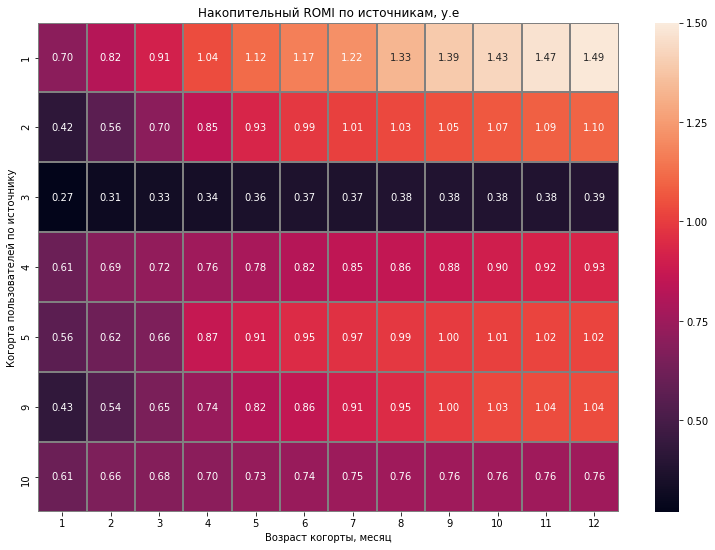

In [95]:
plt.figure(figsize=(13, 9))
sns.heatmap(final_romi_output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=1.5);
plt.xlabel('Возраст когорты, месяц')
plt.ylabel('Когорта пользователей по источнику')
plt.title('Накопительный ROMI по источникам, у.е');

In [96]:
print('Средний LTV по всем источникам на 6 месяц, у.е.:', final_ltv_output.mean(axis=0)[6].round(2))

Средний LTV по всем источникам на 6 месяц, у.е.: 6.42


In [97]:
print('Средний ROMI по всем источникам на 6 месяц, у.е.:', final_romi_output.mean(axis=0)[6].round(2))

Средний ROMI по всем источникам на 6 месяц, у.е.: 0.84


Лучший показатель ROMI равный 1.5 у источника 1: при САС около 7, каждый клиент из этого источника приносит почти 11 у.е. Источник 2 уже заметно отстает, однако показатель ROMI у него второй после источника 1. По скорости окупаемости источник 1 также лидирует — уже на 4 месяц он вышел в плюс, тогда как источник 2 окупился на 7 месяце, а остальные начиная с 9. 

Худшим является источник 3 — даже на 12 месяц его ROMI 0.39, что меньше чем у всех остальных источников в самый первый месяц.

При этом не окупилось по итогам 12 месяцев 3 когорты: источники 3, 4 и 10. 

## Выводы и рекомендации

**3.1. Источники, наиболее выгодные с точки зрения привлечения трафика**

Чтобы определить наиболее выгодны источники трафика можно посмотреть на соотношение расходов на них и доходов, полученных с клиентов из этих источников. Так, в соотношении LTV и САС, то есть ROMI лучшим источником с ощутимым превосходством является источник 1: при САС чуть больше 7 у.е., каждый клиент из этого источника приносит почти 11 у.е.  

По скорости окупаемости источник 1 также лидирует — уже на 4 месяц он вышел в плюс, тогда как источник 2 окупился на 7 месяце, а остальные начиная с 9. 

Худшим является источник 3 — даже на 12 месяц его ROMI 0.39, что меньше чем у всех остальных источников в самый первый месяц.
Не окупилось по итогам 12 месяцев 3 когорты: источники 3, 4 и 10. 

При этом в абсолютных цифрах по выручке лидируют источники 3 и 4, они принесли больше 55 тысяч у.е. каждый, однако оба не окупились из-за высоких расходов на маркетинг и высокой стоимости одного клиента. Если удастся снизить стоимость привлечения клиентов в этих источниках, то они также могли бы быть перспективными.

С мая 2017 по июнь 2018 года на сайт Яндекс.Афиши заходило в среднем 907 уникальных пользователей в день, в неделю — 5716, в месяц — 23228. Среднее значение сессий в день на одного пользователя за весь период с июня 2017 по май 2018 составляет 1.08 сессий. Однако в конце ноября наблюдается значительный всплеск, где показатели превышают 1.20 сессий в день, а в конце марта самые низкие показатели около 1 сессий в день ровно. 

При этом средняя продолжительность сессии составляет 10.7 минут, медианная — 5 минут, если считать просто разницу между временем начала и конца каждой сессии. При этом в данных также около 35 тысяч сессий длительностью 0 секунд, то есть, тех, где время начала и конца сессии совпадает. Это может быть связано с ошибкой в данных или особенностями округления (например, если округление поминутное, то 1 и 59 секунда могут отметиться как одна и та же минута). Средняя и медианные продолжительность сессии при исключении нулевых сессий немного повышаются и составляют, 11.91 и 6 минут соответственно. 
При этом данные распределены крайне неравномерно. К примеру, максимальная продолжительность сессии почти сутки (около 23,5 часов), а минимальная сессия 19 секунд (если не считать нулевые значения). Соответственно, наиболее подходящей мерой для рассчета средней продолжительности сессии является мода, которая в данном случае равна 60 секундам. В целом за это время можно определиться с выбором или посмотреть интересующуюся дату/событие, но для заказа этого времени, конечно, мало.

В ходе анализа было обнаружено, что средний retention rate на второй месяц составляет 6,5%. Количество пользователей на второй месяц во всех когортах очень сильно (практически полностью) падает. Лучшим показателем на второй месяц является Retention когорты сентября 2017 года с 8.55% пользователей, то есть почти 92% падением за месяц. В других когортах ситуациях примерно аналогичная, но показатель retention еще ниже. Важно отметить, что со временем идет снижение retention, так, retention на второй месяц для когорт в 2018 году около 5%, тогда как у первых когорт около 7,5%. Однако стоит отметить, что дальнейшее снижение retention rate в рамках когорты гораздо слабее и в ряде случаев даже растет со временем (как у июньской когорты, например). 

Количество заказов в каждый превышало количество покупателей, что говорит о том, что пользователи в среднем совершали покупки большего одного раза за месяц. Динамика изменений во времени крайне незначительна, количество заказов почти всегда находится пределах 1.20-1.25 заказов в месяц. Самые высокие показатели в декабре 2017, и в марте 2018 года: 1.27 и 1.26 покупок на юзера. 
Среднее количество покупок на одного пользователя за 6 месяцев также — 1.21 заказов.

Средний чек за весь период обычно находился в промежутке между 4 и 5.5 у.е. Самые низкий средний чек пришелся на июнь 2017 и январь 2018 года. Лучшим месяцем с точки зрения среднего чека является декабрь: это наблюдается и по самым высоким показателям  среднего чека, а также по абсолютным цифрам выручки и количества покупателей. Логичным объяснением этого является Новый год и новогодние праздники, сопровждающиеся подарками и большим количеством событий для детей (новогодних елок, концертов и представлений).

В среднем LTV по всем когортам рос одинаково, около на 10% каждый месяц, однако в сентябрьской когорте на 4 месяц LTV вырос на 55%. Ни одна другая когорта не получила такой же резкий рост на 4 месяц. Средний LTV для когорт за 6 месяцев составил 7.97 у.е, самый высокий показатель у сентябрьской когорты — 12.31 у.е, что в 1.5 раза больше среднего значения по всем когортам.  

Рекламные кампании для привлечения клиентов осуществлялись ежедневно на протяжении почти года (364 дня) по каждому источнику (кроме нескольких дней по некоторым). Наибольшие расходы у источника 3 — почти половина от общих расходов (141 322 у.е из 329 тысяч). На источники 1,9 и 10 имеют было потрачено меньше всего денег. В абсолютных цифрах самые большие расходы на источник 3: в одном только ноябре 2017 года расходы на него около 16 тысяч у.е. 

Средний САС по всем когортам равен 9.15 у.е. При этом самые "дешевый" месяц для привлечения пользователей — май 2018 года, когда САС составил 7.44 у.е. В разрезе источников САС в среднем находился на уровне 7 у.е. по каждому из источников, при этом в источниках номер 2 и 3 показатели выше в 1,5-2 раза — 12 и 13.5 у.е.
Если сравнивать накопительный LTV по источникам и средний САС по ним же, то можно сказать, что вложения в большинство источников окупились. Хоть и некоторые совсем незначительно, однако неокупившихся источника всего три: это источники 2 — CАС 13.38, LTV 12.21 у.е.; 3 — CAC 5.20 при LTV 13.49 у.е. и источник 10 — САС 3.35 при LTV 4.38 у.е..

Средний LTV по всем источникам на 6 месяц составил 6.42 у.е, средний ROMI за этот же срок — 0.84, что говорит о том, что источники не окупается к 6 месяцу. Средние показатели ROMI по когортам также говорят о том, что окупаемость приходит в среднем на 9 месяц.

**3.2. Самые перспективные для компании когорты клиентов**

В целом все когорты показали относительно равные показатели, каких-то сильно отличающихся значений или аномалий обнаружить не удалось. 
Однако стоит обратить внимание на сентябрьскую когорту — у нее самый высокий накопительный LTV и лучший показатель ROMI. Эта категория окупилась на 4 месяц, тогда как в среднем когорты окупаются на 9-10 месяце. Средний чек этой когорты за 6 месяцев составил чуть больше 12 у.е., что также является лучшим показателем среди всех: ни одна когорта даже по итогам максимального срока не достигла такого LTV. Также хорошие результаты показывает июньская когорта: к 12 месяцу LTV ее участников превышает 11 у.е., а полная окупаемость наступила на 7 месяце. 

Вместе с этим перспективными также являются оставшиеся летние когорты 2017 года: июльская и августовская, а также когорта декабря. Их LTV умеренно высокий (в сравнении с другими когортами) и превышает 7 у.е по итогам максимальной для каждой из них продолжительности жизни, а ROMI приближается к окупаемости.